In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from tqdm import tqdm_notebook as tqdm
from ipywidgets import IntProgress

## データ読み込み

Scraping.ipynbを先に実行してデータ(total_contents.npy)を作成してください。

In [2]:
dataset = np.load('total_contents.npy')

In [3]:
area_list = {'hokkaido':'Hokkaido,Tohoku','aomori':'Hokkaido,Tohoku','akita':'Hokkaido,Tohoku',
             'yamagata':'Hokkaido,Tohoku','iwate':'Hokkaido,Tohoku','miyagi':'Hokkaido,Tohoku',
             'fukushima':'Hokkaido,Tohoku',
             'aichi':'Chubu','gifu':'Chubu','shizuoka':'Chubu','mie':'Chubu','niigata':'Chubu',
             'yamanashi':'Chubu', 'nagano':'Chubu', 
             'ishikawa':'Chubu','toyama':'Chubu','fukui':'Chubu',
             'okayama':'Chugoku,Shikoku','hiroshima':'Chugoku,Shikoku','tottori':'Chugoku,Shikoku',
             'shimane':'Chugoku,Shikoku',
             'yamaguchi':'Chugoku,Shikoku','kagawa':'Chugoku,Shikoku','tokushima':'Chugoku,Shikoku',
             'ehime':'Chugoku,Shikoku','kochi':'Chugoku,Shikoku',
             'tokyo':'Kanto','kanagawa':'Kanto',
             'chiba':'Kanto','tochigi':'Kanto','ibaraki':'Kanto','gunma':'Kanto',
             'osaka':'Kansai','hyogo':'Kansai','kyoto':'Kansai','shiga':'Kansai',
             'nara':'Kansai','wakayama':'Kansai',
             'fukuoka':'Kyusyu,Okinawa','saga':'Kyusyu,Okinawa','nagasaki':'Kyusyu,Okinawa',
             'kumamoto':'Kyusyu,Okinawa','oita':'Kyusyu,Okinawa',
             'miyazaki':'Kyusyu,Okinawa','kagoshima':'Kyusyu,Okinawa','okinawa':'Kyusyu,Okinawa'}

In [4]:
area_rates = {'Hokkaido,Tohoku':[],'Chubu':[],'Chugoku,Shikoku':[],
            'Kanto':[],'Kansai':[],'Kyusyu,Okinawa':[]}

## 大阪の評価点分布

### Binの確認 
(注意)ヒストグラムのBinsは0.01の倍数刻みになるようにしてください。  
この解析では、評価点3～5の範囲を0.04刻みでヒストグラムを作成しています。

In [5]:
rates_osaka = [i['rates'] for i in dataset[32]]
h = np.histogram(rates_osaka,range=(3, 5), bins=50)
print('bins =',h[1]) #bin数の確認、増加量は0.01の倍数になるように

bins = [3.   3.04 3.08 3.12 3.16 3.2  3.24 3.28 3.32 3.36 3.4  3.44 3.48 3.52
 3.56 3.6  3.64 3.68 3.72 3.76 3.8  3.84 3.88 3.92 3.96 4.   4.04 4.08
 4.12 4.16 4.2  4.24 4.28 4.32 4.36 4.4  4.44 4.48 4.52 4.56 4.6  4.64
 4.68 4.72 4.76 4.8  4.84 4.88 4.92 4.96 5.  ]


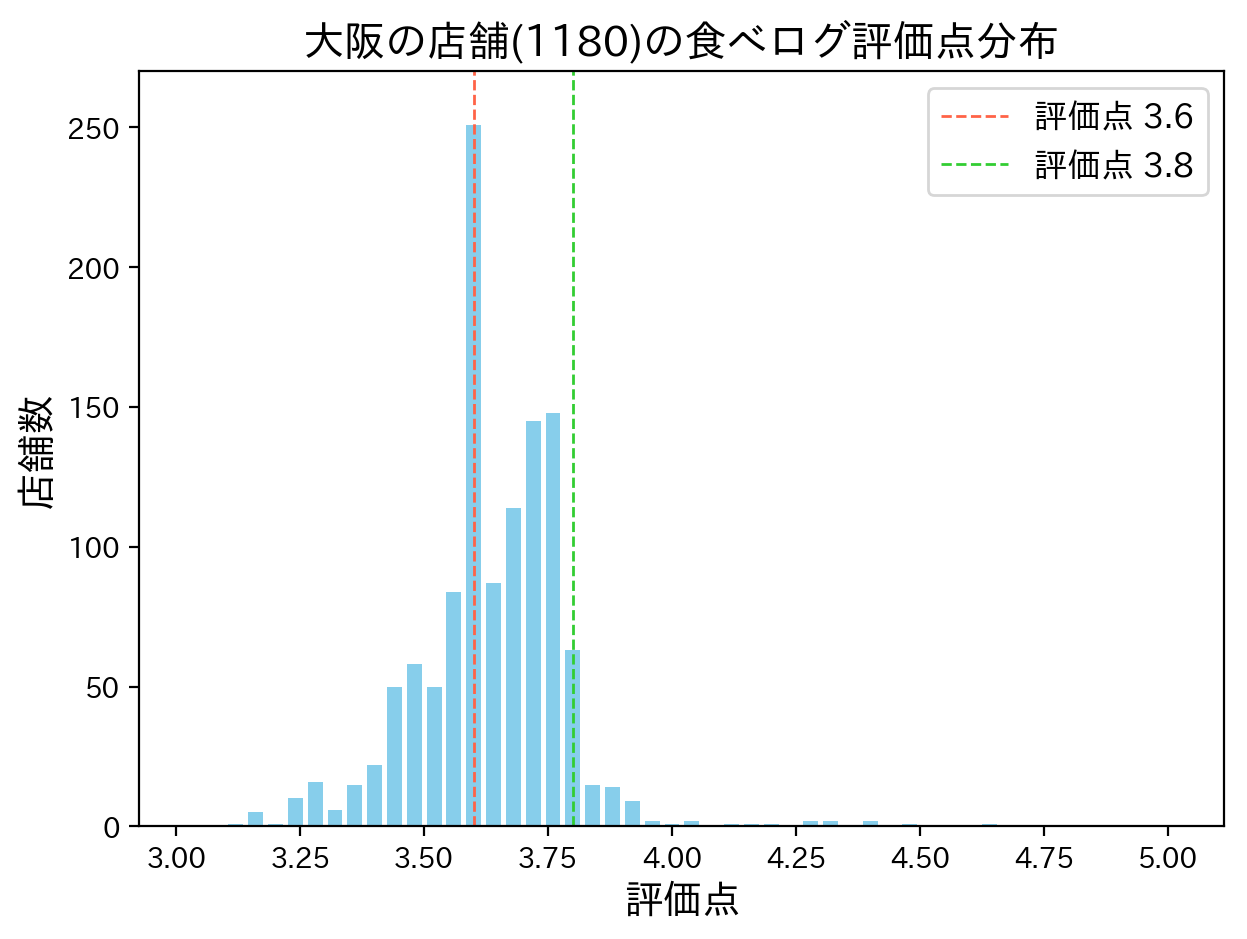

In [6]:
fig = plt.figure(figsize=(7,5),dpi=200)
p1 = plt.bar(h[1][1:],h[0],width=0.03,color='skyblue')
plt.plot([3.6,3.6],[0,300],c='tomato',lw=1,ls='--',label='評価点 3.6')
plt.plot([3.8,3.8],[0,300],c='limegreen',lw=1,ls='--',label='評価点 3.8')
plt.ylim(0,270)
plt.title('大阪の店舗('+str(len(rates_osaka))+')の食べログ評価点分布',fontsize=15)
plt.ylabel('店舗数',fontsize=14)
plt.xlabel('評価点',fontsize=14)
plt.legend(fontsize=12)

## 各地域の評価点分布

In [7]:
for data in dataset:
    for d in data:
        area_rates[area_list[d['pref']]].append([d['rates'],d['isPremium']])

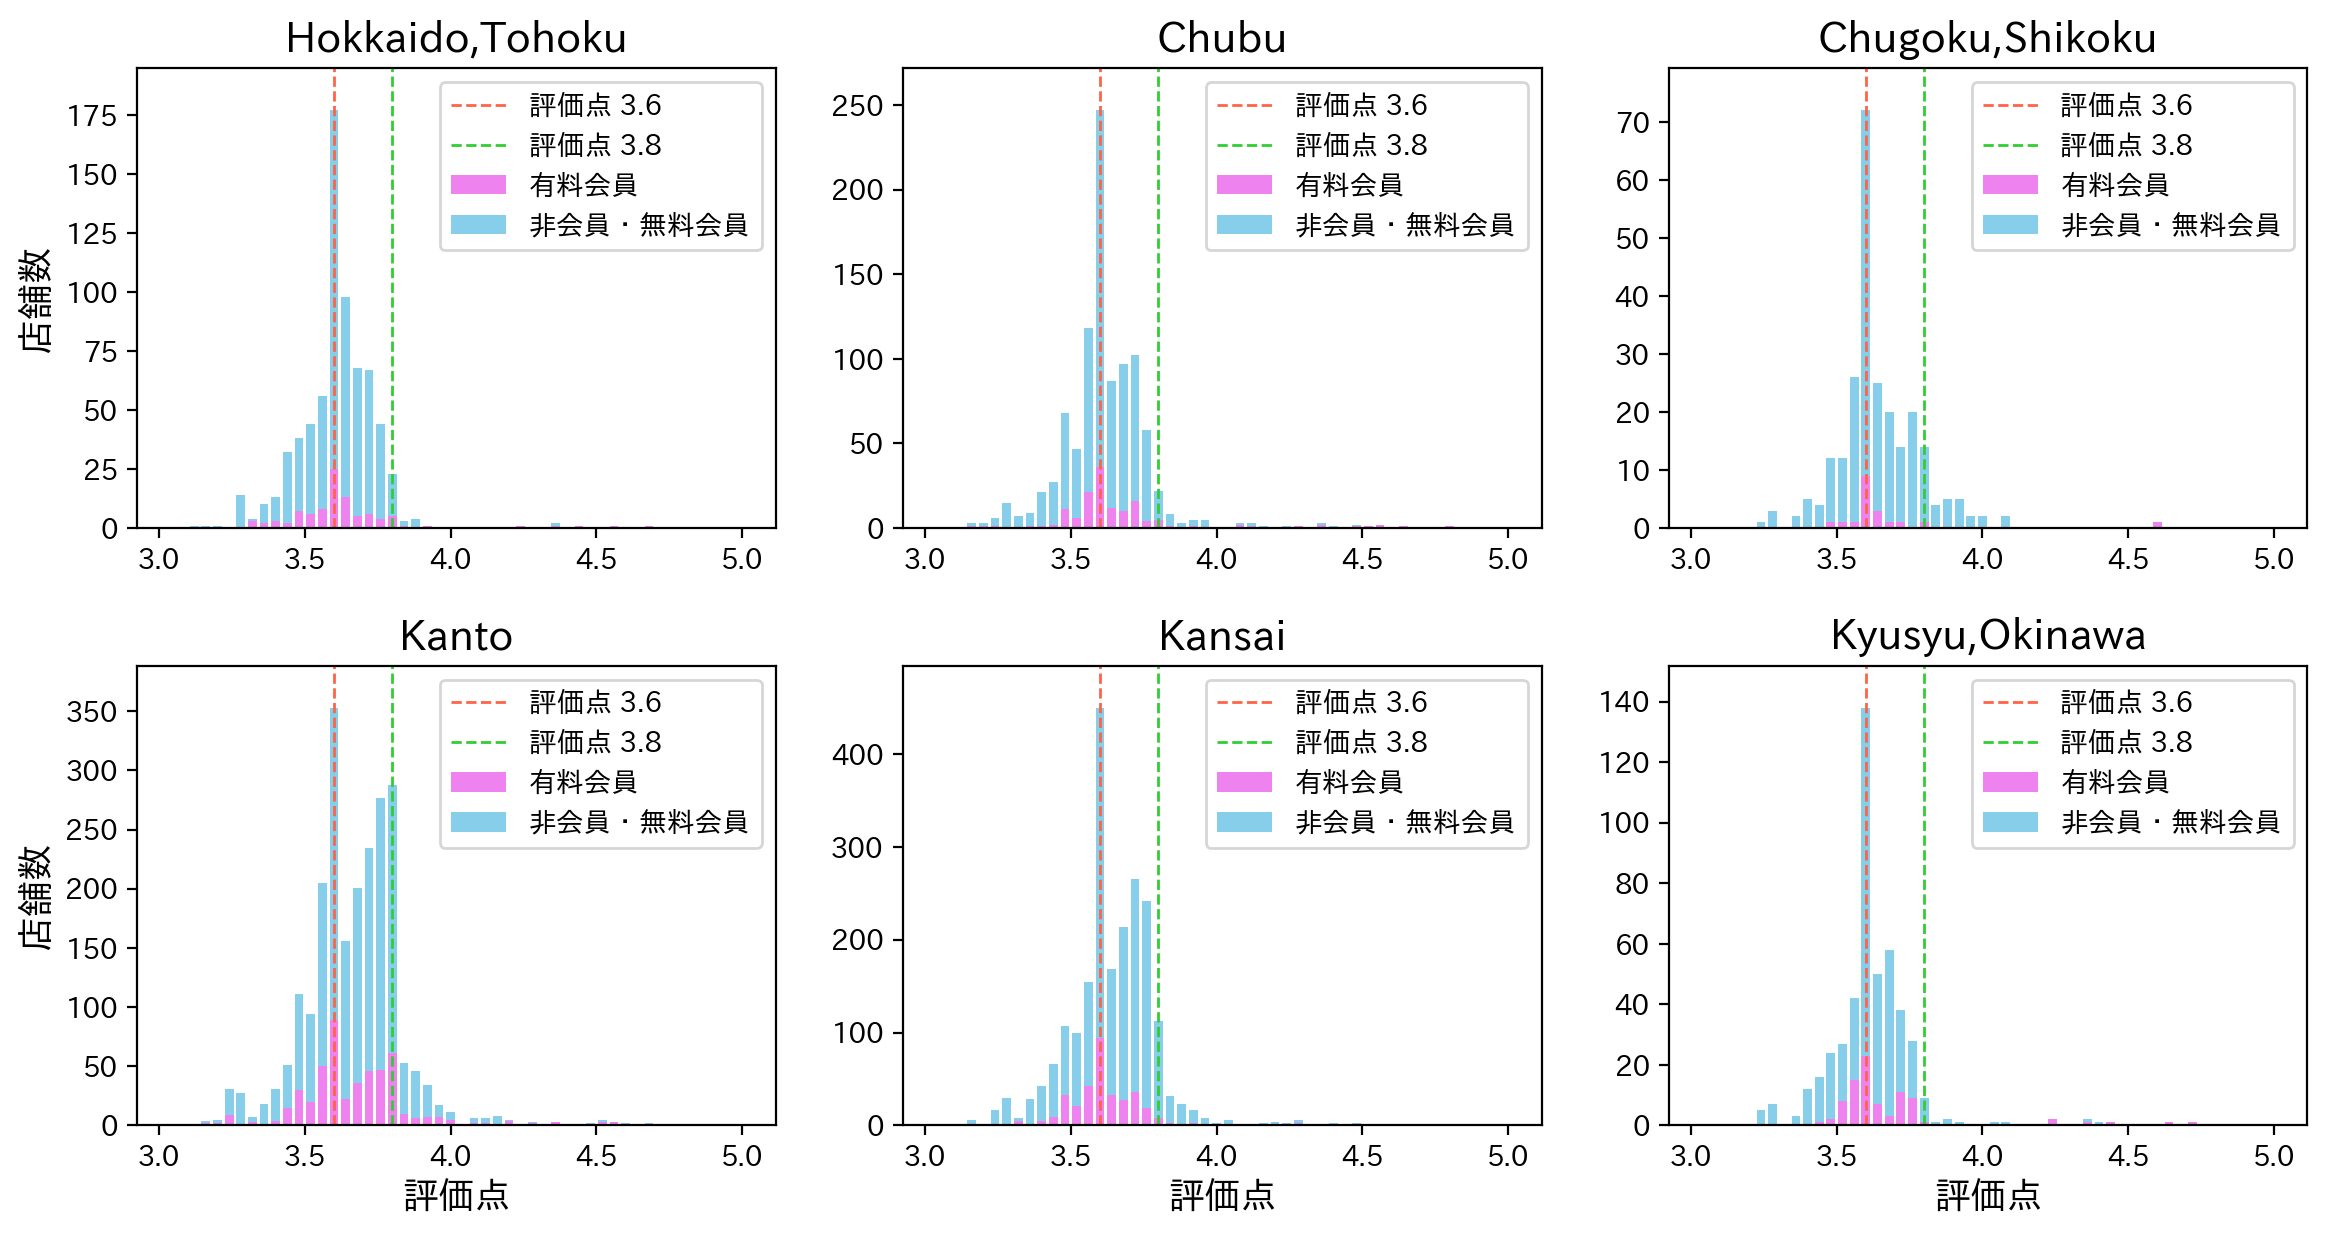

In [8]:
fig = plt.figure(figsize=(14,7),dpi=200)
plt.subplots_adjust(hspace=0.3)
for n,area in enumerate(list(area_rates.keys())):
    plt.subplot(2,3,n+1)
    
    idx = np.where(np.array(area_rates[area])[:,1] == 1)
    h = np.histogram(np.array(area_rates[area])[idx,0],range=(3, 5), bins=50)
    p1 = plt.bar(h[1][1:],h[0],width=0.03,color='violet',label='有料会員')
    
    bottom = h[0]
    
    idx = np.where(np.array(area_rates[area])[:,1] == 0)
    h = np.histogram(np.array(area_rates[area])[idx,0],range=(3, 5), bins=50)
    p1 = plt.bar(h[1][1:],h[0],bottom=bottom,width=0.03,color='skyblue',label='非会員・無料会員')
    
    plt.plot([3.6,3.6],[0,np.max(h[0]+bottom+100)],c='tomato',lw=1,ls='--',label='評価点 3.6')
    plt.plot([3.8,3.8],[0,np.max(h[0]+bottom+100)],c='limegreen',lw=1,ls='--',label='評価点 3.8')
    plt.legend(fontsize=10)
    plt.ylim(0,np.max((h[0]+bottom)*1.1))
    if(n == 0 or n==3):
        plt.ylabel('店舗数',fontsize=13)
    if(n == 3 or n == 4 or n == 5):
        plt.xlabel('評価点',fontsize=13)
    plt.title(area,fontsize=15)

## 全体の評価点分布と非会員・無料会員の割合

In [9]:
total_rates = []
for data in dataset:
    for d in data:
        total_rates.append([d['rates'],int(d['isPremium'])])
total_rates = np.array(total_rates)

In [10]:
np.where(total_rates[:,1]==1)[0].shape

(1201,)

In [11]:
np.where(total_rates[:,1]==0)[0].shape

(5651,)

### 非会員・無料会員の全体に対する割合

C:\Users\konkon\Anaconda3\envs\W2V\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\konkon\Anaconda3\envs\W2V\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


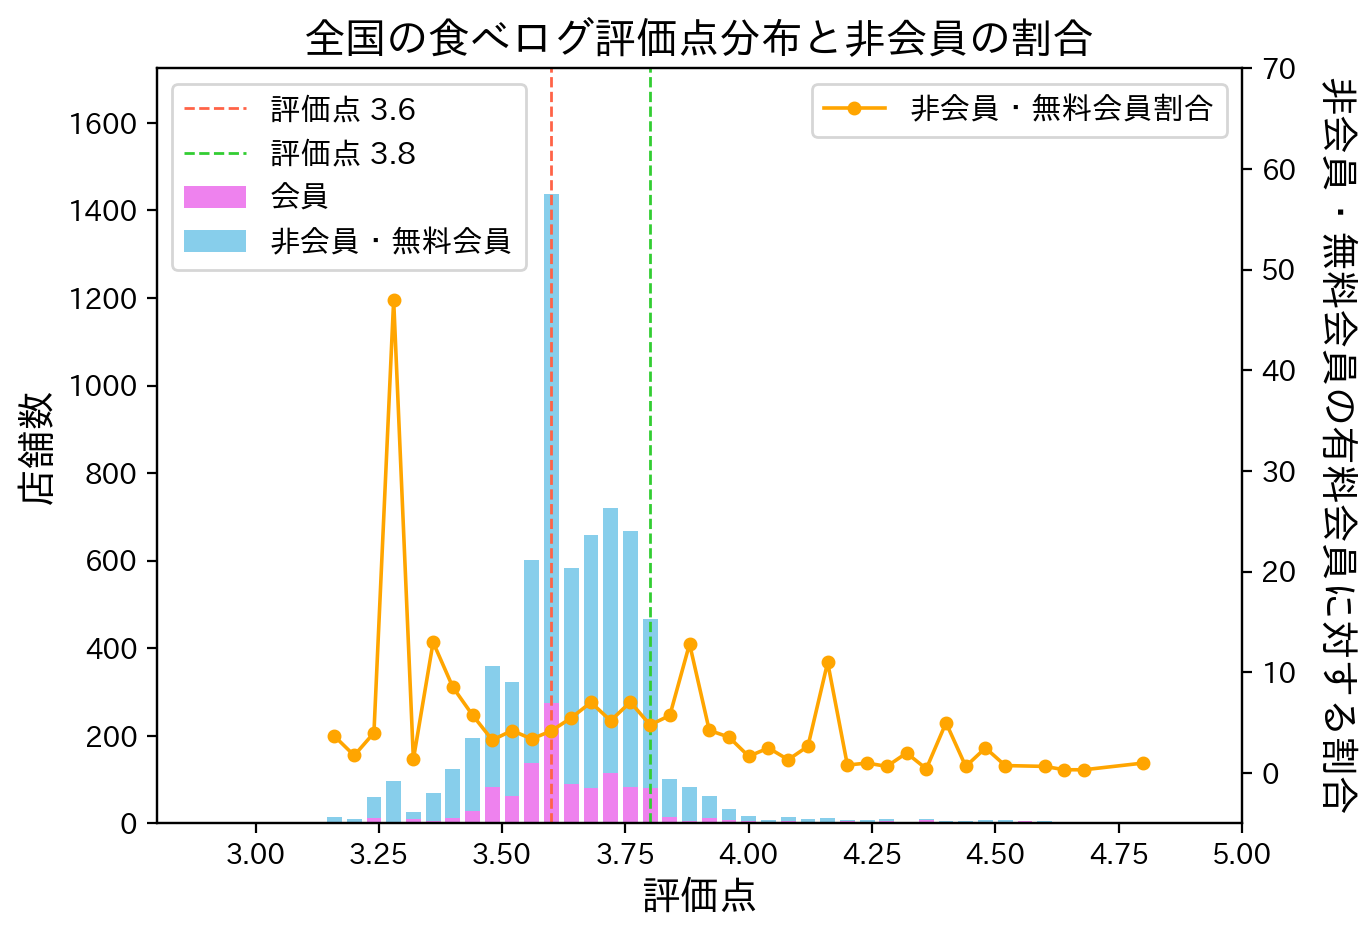

In [12]:
fig = plt.figure(figsize=(7,5),dpi=200)
ax1 = fig.add_subplot(111)

idx = np.where(total_rates[:,1] == 1)
h = np.histogram(total_rates[idx,0],range=(3, 5), bins=50)
p1 = ax1.bar(h[1][1:],h[0],width=0.03,color='violet',label='会員')
bottom = h[0]

idx = np.where(total_rates[:,1] == 0)
h = np.histogram(total_rates[idx,0],range=(3, 5), bins=50)
p1 = ax1.bar(h[1][1:],h[0],bottom=bottom,width=0.03,color='skyblue',label='非会員・無料会員')
ax1.plot([3.6,3.6],[0,np.max(h[0]+bottom+1000)],c='tomato',lw=1,ls='--',label='評価点 3.6')
ax1.plot([3.8,3.8],[0,np.max(h[0]+bottom+1000)],c='limegreen',lw=1,ls='--',label='評価点 3.8')
ax1.legend(fontsize=11,loc='upper left')
ax1.set_ylim(0,np.max((h[0]+bottom)*1.2))
ax1.set_ylabel('店舗数',fontsize=14)
ax1.set_xlim(2.8,5)
plt.xlabel('評価点',fontsize=14)
    
plt.title('全国の食べログ評価点分布と非会員の割合',fontsize=15)

ax2 = ax1.twinx()

range_ = h[1][1:]
ratios = h[0]/(bottom)
inf_idx = np.isinf(ratios)
nan_idx = np.isnan(ratios)
ratios[inf_idx] = 0
ratios[nan_idx] = 0

idx = np.where(ratios != 0)
ax2.plot(range_[idx],ratios[idx],marker='o',ms=4,lw=1.3,color='orange',label='非会員・無料会員割合')
ax2.set_ylim(-5,70)
# ax2.set_yscale('log')
# ax2.set_ylim(0,3)
ax2.set_ylabel('非会員・無料会員の有料会員に対する割合',fontsize=14,rotation=270,labelpad=20)
ax2.legend(loc='upper right',fontsize=11)

### 非会員・無料会員の有料会員に対する比率

C:\Users\konkon\Anaconda3\envs\W2V\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


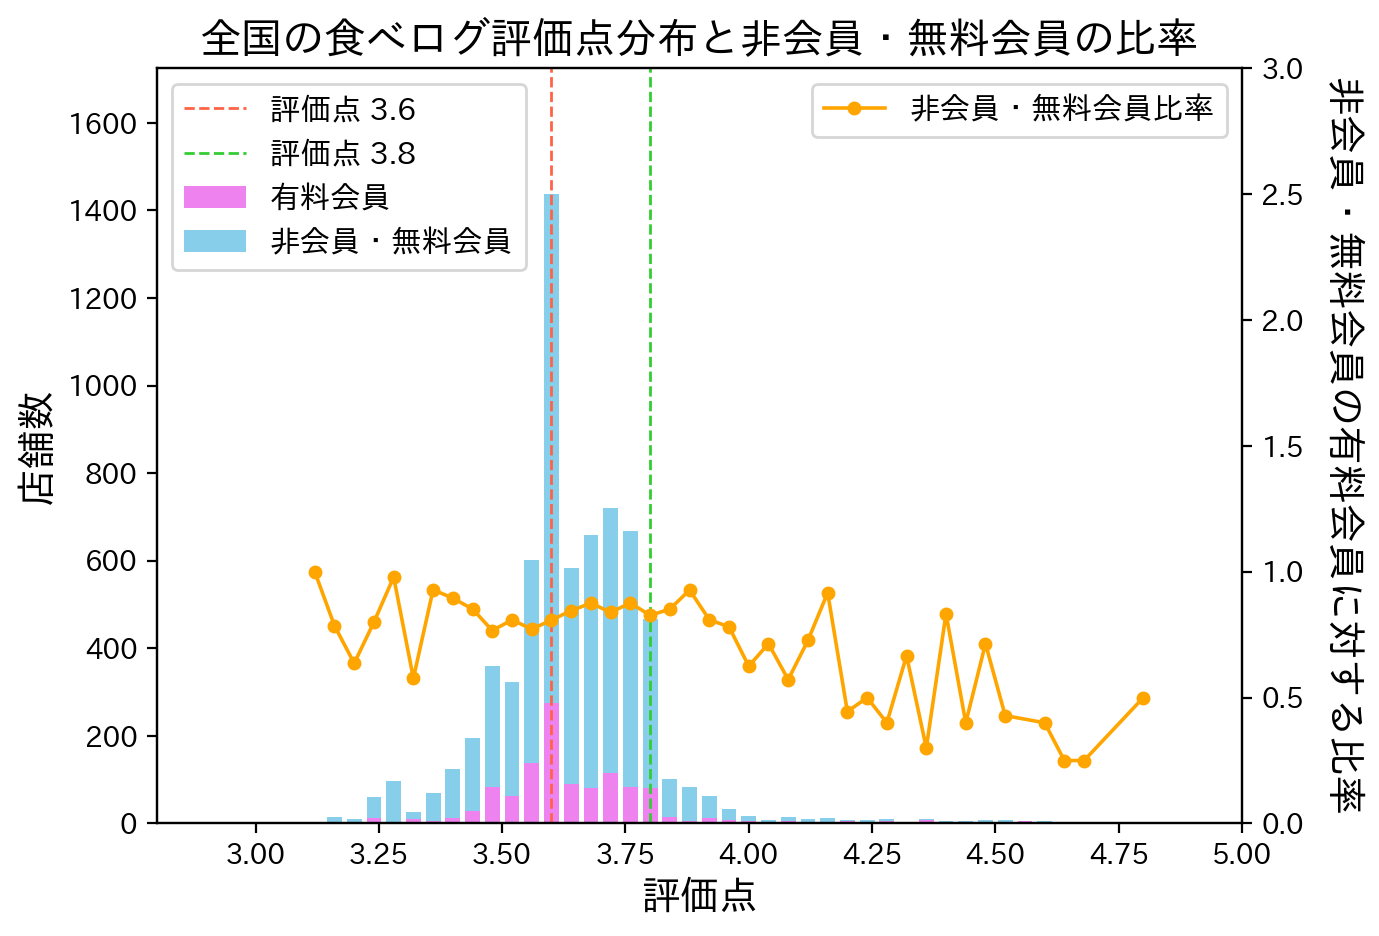

In [13]:
fig = plt.figure(figsize=(7,5),dpi=200)
ax1 = fig.add_subplot(111)

idx = np.where(total_rates[:,1] == 1)
h = np.histogram(total_rates[idx,0],range=(3, 5), bins=50)
p1 = ax1.bar(h[1][1:],h[0],width=0.03,color='violet',label='有料会員')
bottom = h[0]

idx = np.where(total_rates[:,1] == 0)
h = np.histogram(total_rates[idx,0],range=(3, 5), bins=50)
p1 = ax1.bar(h[1][1:],h[0],bottom=bottom,width=0.03,color='skyblue',label='非会員・無料会員')
ax1.plot([3.6,3.6],[0,np.max(h[0]+bottom+1000)],c='tomato',lw=1,ls='--',label='評価点 3.6')
ax1.plot([3.8,3.8],[0,np.max(h[0]+bottom+1000)],c='limegreen',lw=1,ls='--',label='評価点 3.8')
ax1.legend(fontsize=11,loc='upper left')
ax1.set_ylim(0,np.max((h[0]+bottom)*1.2))
ax1.set_ylabel('店舗数',fontsize=14)
ax1.set_xlim(2.8,5)
plt.xlabel('評価点',fontsize=14)
    
plt.title('全国の食べログ評価点分布と非会員・無料会員の比率',fontsize=15)

ax2 = ax1.twinx()

range_ = h[1][1:]
ratios = h[0]/(bottom+h[0])
inf_idx = np.isinf(ratios)
nan_idx = np.isnan(ratios)
ratios[inf_idx] = 0
ratios[nan_idx] = 0

idx = np.where(ratios != 0)
ax2.plot(range_[idx],ratios[idx],marker='o',ms=4,lw=1.3,color='orange',label='非会員・無料会員比率')
# ax2.set_ylim(-5,70)
# ax2.set_yscale('log')
ax2.set_ylim(0,3)
ax2.set_ylabel('非会員・無料会員の有料会員に対する比率',fontsize=14,rotation=270,labelpad=20)
ax2.legend(loc='upper right',fontsize=11)